<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/Kaggle_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- CRIM	자치시(town)별 1인당 범죄율
- ZN	25,000 평방 피트가 넘는 거주지역 토지 비율
- INDUS	자치시(town)별 비소매 상업지역 토지 비율
- CHAS	찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0)
- NOX	10,000,000당 일산화질소 농도
- RM	주택 1가구당 평균 방의 수
- AGE	1940년 이전에 건축된 소유주택 비율
- DIS	5개의 보스턴 고용 센터까지의 가중 거리
- RAD	방사형 고속도로 접근성 지수
- TAX	10,000 달러당 재산 세율
- PTRATIO	자치시(town)별 학생/교사 비율
- B	1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율
- LSTAT	모집단의 하위계층 비율(%)
- MEDV	소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings(action="ignore")

# EDA

In [2]:
#데이터 불러오기
df = pd.read_csv("housing.csv")
print(df.shape) #505, 1

(505, 1)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
None


In [5]:
#컬럼추가
column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_name)
print(df.shape) #(506, 14)

(506, 14)


In [6]:
print(df.info()) #null값x, object값 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [7]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [8]:
print(df.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [10]:
#target data 분류
X = df.drop("MEDV", axis=1) #506,13
y = df["MEDV"] #506,
print(X.shape, y.shape)

(506, 13) (506,)


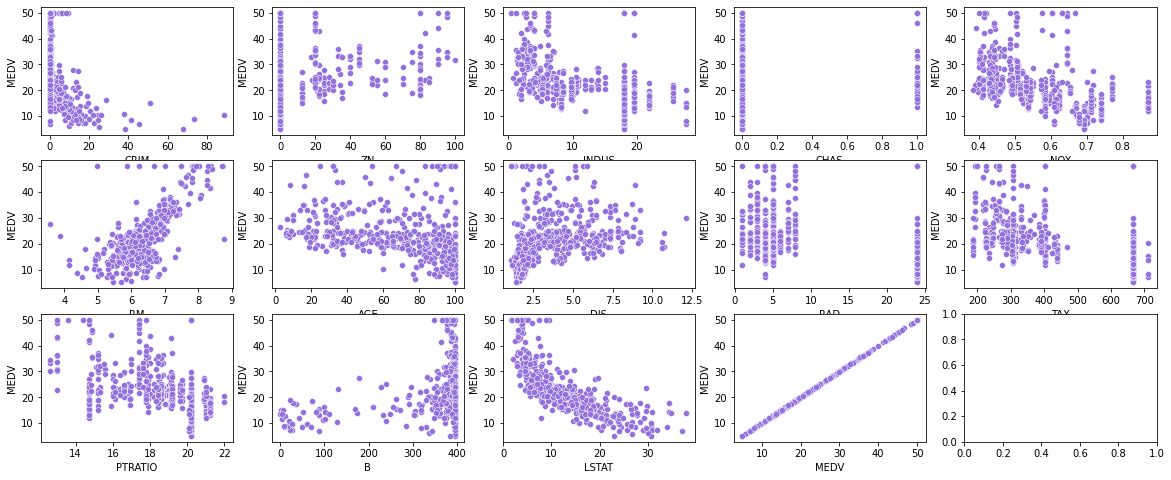

In [11]:
#visualization
flg, axs = plt.subplots(figsize=(20,8), ncols=5, nrows=3)
for i, col in enumerate(df.columns):
    r = int(i / 5)
    c = i % 5
    sns.scatterplot(x=col, y='MEDV', data=df, ax=axs[r][c], color='mediumpurple')

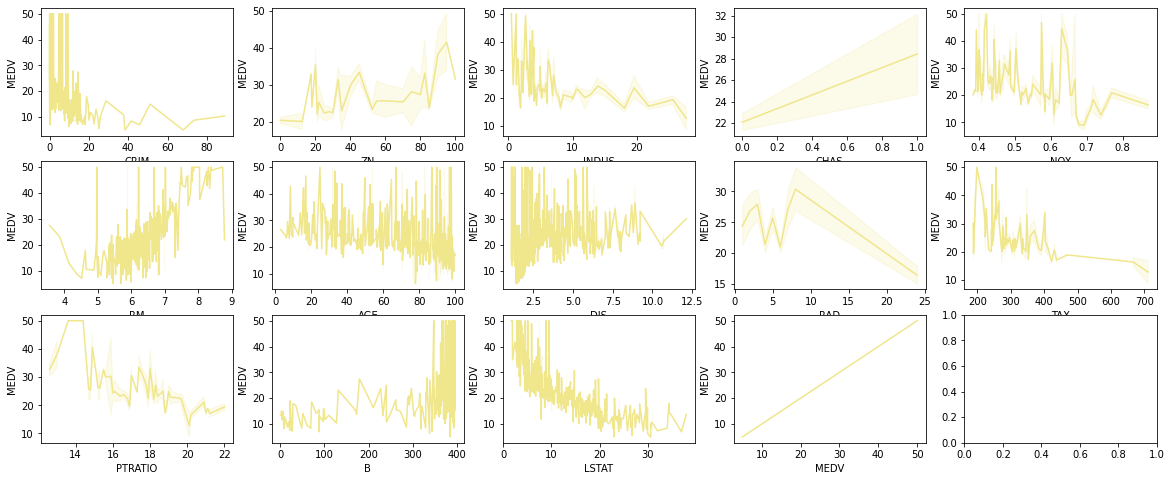

In [12]:
flg, axs = plt.subplots(figsize=(20,8), ncols=5, nrows=3)
for i, col in enumerate(df.columns):
    r = int(i / 5)
    c = i % 5
    sns.lineplot(x=col, y='MEDV', data=df, ax=axs[r][c], color='khaki')

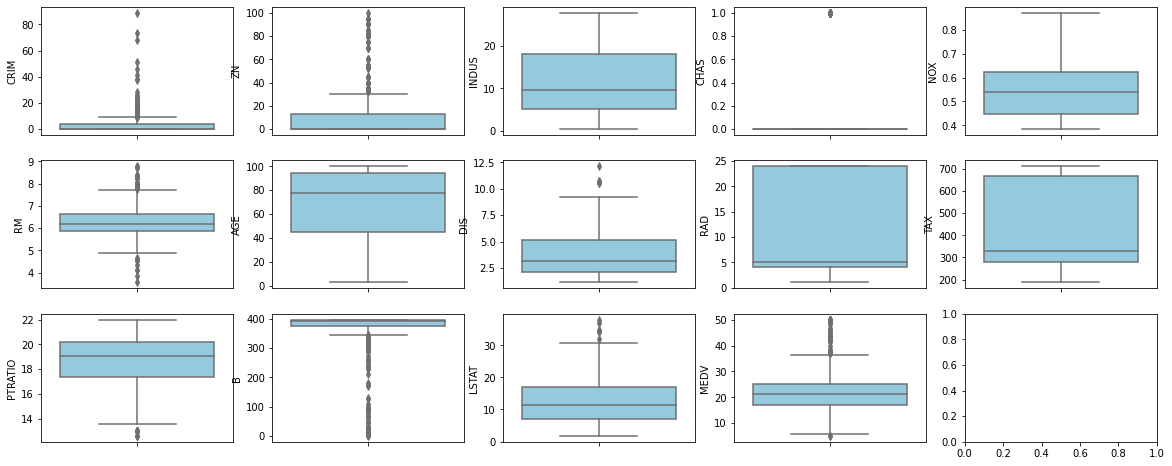

In [13]:
flg, axs = plt.subplots(figsize=(20,8), ncols=5, nrows=3)
for i, col in enumerate(df.columns):
    r = int(i / 5)
    c = i % 5
    sns.boxplot(y=col, data=df, ax=axs[r][c], color='skyblue')

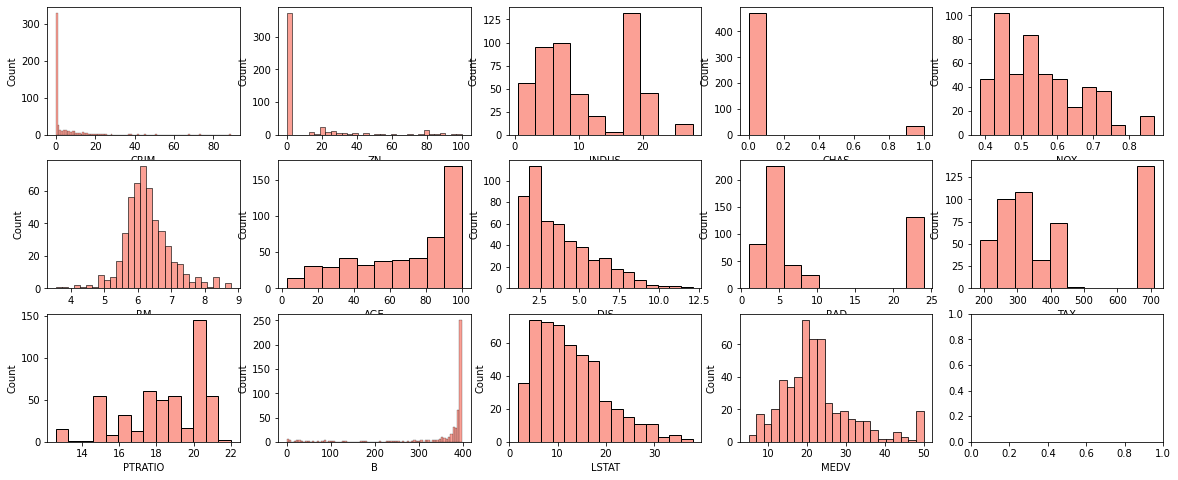

In [14]:
flg, axs = plt.subplots(figsize=(20,8), ncols=5, nrows=3)
for i, col in enumerate(df.columns):
    r = int(i / 5)
    c = i % 5
    sns.histplot(x=col, data=df, ax=axs[r][c], color='salmon')

#Feature Engineering

In [17]:
def CHECK_OUTLIER(df=None, column=None):
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight
    outlier_idx = df[column][  (df[column]<minimum) | (df[column]>maximum)  ].index
    return outlier_idx
    outlier_idx = CHECK_OUTLIER(df=df, column=col)
    print(col, outlier_idx)

numeric_columns = df.dtypes[df.dtypes != 'object'].index
for i, col in enumerate(numeric_columns) :
    outlier_idx = CHECK_OUTLIER(df=df, column=col)
    print(col , outlier_idx)
    df.drop(outlier_idx, axis=0, inplace=True)

CRIM Int64Index([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
            385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
            405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
            419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
            439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
            479],
           dtype='int64')
ZN Int64Index([ 39,  40,  54,  55,  56,  57,  65,  66, 193, 194, 195, 196, 197,
            198, 199, 200, 201, 202, 203, 204, 254, 255, 256, 283, 284, 285,
            286, 287, 288, 289, 290, 291, 292, 298, 299, 300, 343, 344, 347,
            348, 351, 352, 353, 354, 355],
           dtype='int64')
INDUS Int64Index([], dtype='int64')
CHAS Int64Index([142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216,
            218, 219, 220, 221, 222, 234, 236, 269, 273, 274, 276, 277, 282,
            356, 357, 358, 363, 364, 369, 370, 372],
           dtyp

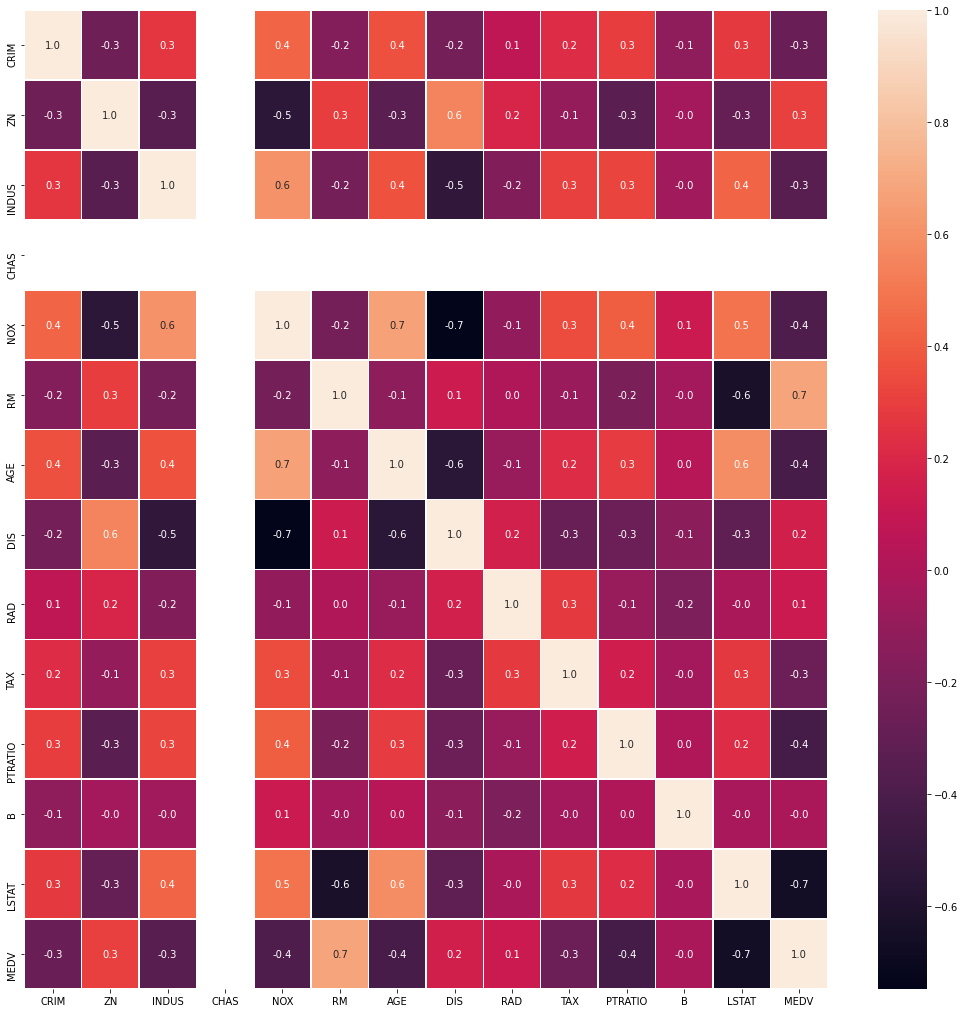

In [18]:
#상관관계
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

- 집값(MEDV)과 LSTAT(하위계층 비율):-0.7, INDUS(비소매 상업지역 비율), TAX(재산세율), PTRATIO(자치시별 학생/교사비율):-0.5는 음의 상관관계
- RM(방 갯수):0.7, ZN(25,000 이상 비율):0.4는 양의 상관관계 가짐   => 방의 갯수가 많고, 거주지 평수가 높을 수록 집값 상승

In [19]:
#scailing
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Model

In [20]:
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7225956442500947
평가 데이터 점수: 0.7889116041910486


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2)
model.fit(X_train, y_train)
print("스케일링 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("스케일링 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

스케일링 학습 데이터 점수: 0.7515519110176574
스케일링 평가 데이터 점수: 0.685876701947079


In [23]:
#교차 검증
#NMSE(Negative Mean Squared Error) 사용
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("MNSE scores: {}".format(scores))
print("MNSE scores mean : {}".format(scores.mean()))
print("MNSE scores std : {}".format(scores.std()))

MNSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
MNSE scores mean : -34.70525594452485
MNSE scores std : 45.573999200308755


In [24]:
#결정계수 (R^2사용)
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("R2 scores: {}".format(r2_scores))
print("R2 scores mean : {}".format(r2_scores.mean()))
print("R2 scores std : {}".format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.20252899006056452
R2 scores std : 0.5952960169512248


In [25]:
print('y= ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y= 22.416634376827272 
-0.8950480316316255 * x0
1.1976039268158911 * x1
0.029788731852378902 * x2
0.33525239073840807 * x3
-1.949865822215898 * x4
2.4672340712853797 * x5
0.11472382409749157 * x6
-2.885380404607638 * x7
2.663910751887328 * x8
-2.1636529957031363 * x9
-2.1264492643232216 * x10
0.7940547850895787 * x11
-3.6829949547832683 * x12


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 4.531340965901093
R2 Score: 0.7515519110176574


In [28]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 5.344502307151522
R2 Score: 0.685876701947079


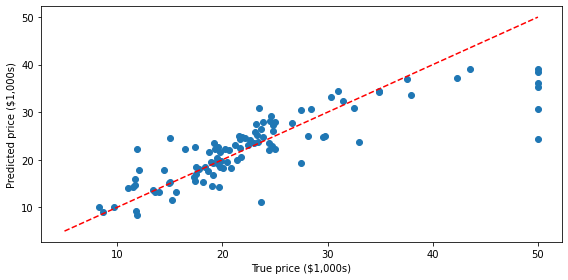

In [30]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)
plt.show()
#빨간 선에 가까울수록 실제값=예측값